<a href="https://colab.research.google.com/github/rudeboybert/SDS390/blob/master/PS/PS01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 01
1. Name: Albert Y. Kim
1. Field that you're interested in applying TS and forecasting to (ecology, econ, weather, etc): ecology and econ

# Obtain a CSV of time series data
1. By whatever means, get a `.csv` file of time series data relating to any topic: ecological, financial, etc.
1. There should be at least three variables of data
1. If you download from the web, include a link. If you use ChatGPT, include a link to your shared search

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import pandas as pd
import statsmodels.api as sm

## Get BTC data

In [3]:
# ChatGPT Code from https://chat.openai.com/share/572f7333-82a9-411f-95df-4f543fd3ae96

# CoinGecko API endpoint for historical market data
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"

# Specify the number of days to retrieve (180 days for 6 months)
params = {
    "vs_currency": "usd",
    "days": "180",
}

# Send GET request to the API
response = requests.get(url, params=params)

# Get the BTC price data from the API response
btc_price_data = response.json()["prices"]

# Convert the price data to a Pandas DataFrame
df = pd.DataFrame(btc_price_data, columns=["Timestamp", "Price"])

# Convert the timestamp to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit="ms")

In [4]:
# Set index of data frame to be date
btc_df = df.set_index('Timestamp')
btc_df.rename(columns={"Price": "BTC"}, inplace = True)

btc_df.info()
btc_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 181 entries, 2023-04-08 00:00:00 to 2023-10-04 19:08:03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BTC     181 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


,BTC
Timestamp,
2023-04-08,27934.438713
2023-04-09,27968.128047
2023-04-10,28351.236994
2023-04-11,29657.974137
2023-04-12,30260.936109


## Get ETH data

In [5]:
# CoinGecko API endpoint for historical market data
url = "https://api.coingecko.com/api/v3/coins/ethereum/market_chart"

# Specify the number of days to retrieve (180 days for 6 months)
params = {
    "vs_currency": "usd",
    "days": "180",
}

# Send GET request to the API
response = requests.get(url, params=params)

# Get the BTC price data from the API response
eth_price_data = response.json()["prices"]

# Convert the price data to a Pandas DataFrame
df = pd.DataFrame(eth_price_data, columns=["Timestamp", "Price"])

# Convert the timestamp to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit="ms")

In [6]:
# Set index of data frame to be date
eth_df = df.set_index('Timestamp')
eth_df.rename(columns={"Price": "ETH"}, inplace = True)

eth_df.info()
eth_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 181 entries, 2023-04-08 00:00:00 to 2023-10-04 17:22:04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ETH     181 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


,ETH
Timestamp,
2023-04-08,1866.657545
2023-04-09,1851.050671
2023-04-10,1859.940387
2023-04-11,1909.882061
2023-04-12,1892.938911


## Get SOL data

In [7]:
# CoinGecko API endpoint for historical market data
url = "https://api.coingecko.com/api/v3/coins/solana/market_chart"

# Specify the number of days to retrieve (180 days for 6 months)
params = {
    "vs_currency": "usd",
    "days": "180",
}

# Send GET request to the API
response = requests.get(url, params=params)

# Get the BTC price data from the API response
sol_price_data = response.json()["prices"]

# Convert the price data to a Pandas DataFrame
df = pd.DataFrame(sol_price_data, columns=["Timestamp", "Price"])

# Convert the timestamp to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit="ms")

In [8]:
# Set index of data frame to be date
sol_df = df.set_index('Timestamp')
sol_df.rename(columns={"Price": "SOL"}, inplace = True)

sol_df.info()
sol_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 181 entries, 2023-04-08 00:00:00 to 2023-10-04 18:59:15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SOL     181 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


,SOL
Timestamp,
2023-04-08,20.483785
2023-04-09,20.042581
2023-04-10,20.304337
2023-04-11,20.875123
2023-04-12,23.005655


In [9]:
# Merge all three data frames and save to csv
# Export the DataFrame to a CSV file
crypto_df = btc_df.join(eth_df, how = 'inner').join(sol_df, how = 'inner')
crypto_df.info()
crypto_df.to_csv("crypto_price_data.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2023-04-08 to 2023-10-04
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BTC     180 non-null    float64
 1   ETH     180 non-null    float64
 2   SOL     180 non-null    float64
dtypes: float64(3)
memory usage: 5.6 KB


In [10]:
crypto_df.head()

,BTC,ETH,SOL
Timestamp,,,
2023-04-08,27934.438713,1866.657545,20.483785
2023-04-09,27968.128047,1851.050671,20.042581
2023-04-10,28351.236994,1859.940387,20.304337
2023-04-11,29657.974137,1909.882061,20.875123
2023-04-12,30260.936109,1892.938911,23.005655


# 1. Time series plots
1. Plot the raw time series data
1. Identify any time series patterns
1. Identify any interesting trends insight

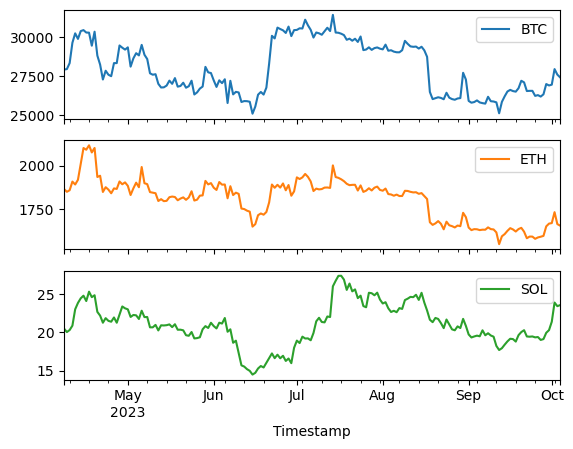

In [11]:
crypto_df.plot(subplots = True, title = "")
plt.show()

There does seem to be some mild seasonality in all three coins: periods of highs followed by lows. Furthermore, the peaks and valleys seem to occur at the same time, suggesting a high degree of correlation between the coins. Especially Ethereum (ETH) and Bitcoin (BTC). This suggests to be in the six months there was no real advantage to investing in one over the other. **However the price of solana (SOL) does seem to be a little independent from the other two coins.**

# 2. Scatterplots
1. Plot a 3x3 grid of all pairwise scatterplots
1. Identify any interesting trends insight

array([[<AxesSubplot:xlabel='BTC', ylabel='BTC'>,
        <AxesSubplot:xlabel='ETH', ylabel='BTC'>,
        <AxesSubplot:xlabel='SOL', ylabel='BTC'>],
       [<AxesSubplot:xlabel='BTC', ylabel='ETH'>,
        <AxesSubplot:xlabel='ETH', ylabel='ETH'>,
        <AxesSubplot:xlabel='SOL', ylabel='ETH'>],
       [<AxesSubplot:xlabel='BTC', ylabel='SOL'>,
        <AxesSubplot:xlabel='ETH', ylabel='SOL'>,
        <AxesSubplot:xlabel='SOL', ylabel='SOL'>]], dtype=object)

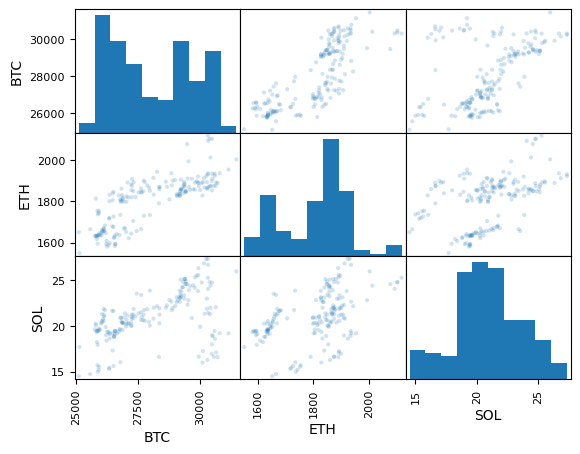

In [12]:
pd.plotting.scatter_matrix(crypto_df, alpha=0.2)

As suggested above there seems to be a strong positive correlation between Bitcoin and Etherum, but not as strong with Solana. This suggest to me that investing in Solana is a good hedge to investing in the other two coins. Let's confirm this with numerical values:

In [13]:
crypto_df.corr()

,BTC,ETH,SOL
BTC,1.000000,0.790124,0.501014
ETH,0.790124,1.000000,0.463094
SOL,0.501014,0.463094,1.000000


# 3. Lag & autocorrelation plots
1. Plot a lag plot of any variable of your choice to *visualize* its relationship to itself in the past. Use a maximum $k$ value of your choice
1. Plot an autocorrelation plot of this same variable to *quantify* its relationship to itself in the past. Use a maximum $k$ value of your choice

I **REALLY** struggled with this first question. I was able to generate a lag plot for a single $k$ very quickly, but it took me a LONG time to figure out:;

1. How to combine multiple plots into a single plot. I found an answer [here](https://wellsr.com/python/drawing-multiple-plots-with-matplotlib-in-python/)
1. Convert the code to a for loop. I had to Google "how do I write a for loop in python"!
1. Figure out how to have the title show the correct lag number

Growth mindset!

Looking at the plots below, we see that as the lag increases, the strength of the positive correlation weakens, suggesting less and less predictive information in earlier and earlier past values.

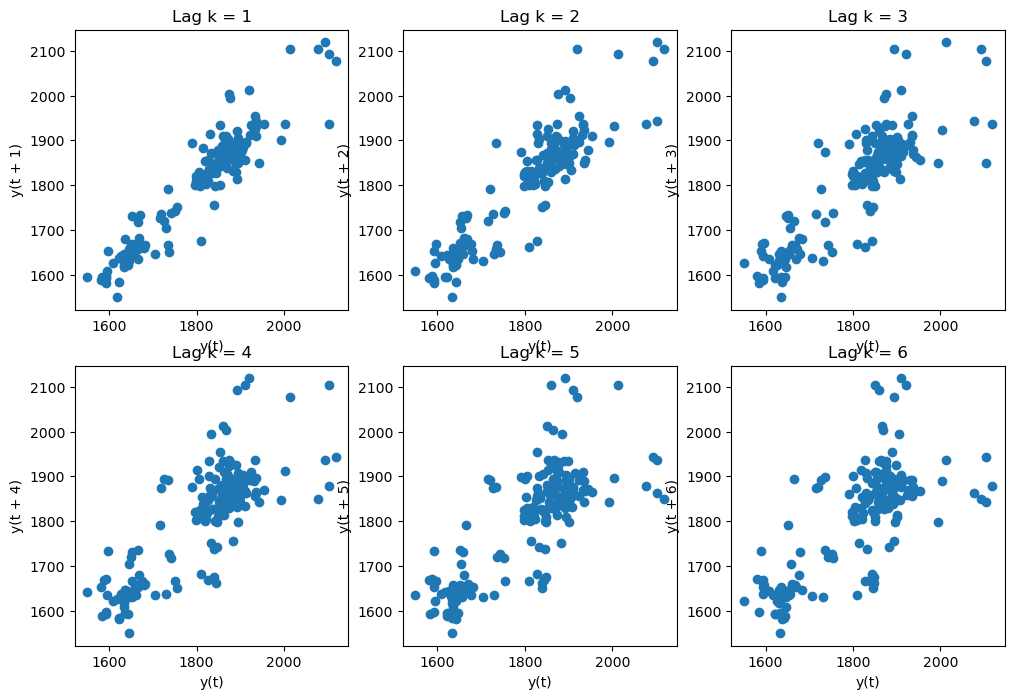

In [14]:
plt.rcParams["figure.figsize"] = [12,8]
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.title("Lag k = " + str(i+1))
    pd.plotting.lag_plot(crypto_df['ETH'], lag = i + 1)
plt.show()    

Text(0.5, 1.0, 'Ethereum autocorrelation (days)')

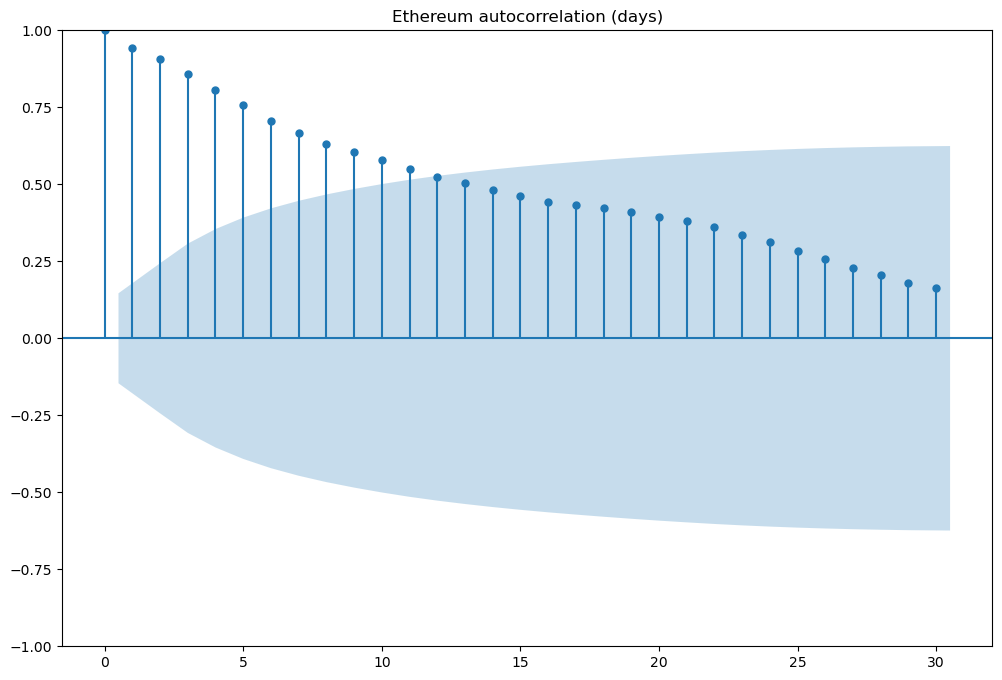

In [23]:
# Autocorrelation
sm.graphics.tsa.plot_acf(crypto_df['ETH'], lags=30)
plt.title("Ethereum autocorrelation (days)")

The autocorrelation is high at first as we would expect (values of $k$ days less than 20 say), but eventually this decays to 0. This suggests that in this time period, there is little predictive value for Ethereum in past values past $k$ = 20 days around. Note the second DataCamp course will instruct us that the blue bands are 95% confidence intervals since the default `alpha` value for `plot_acf()` is 0.05.

# 4. Extra

What's the difference between the first two and the third output?

In [27]:
crypto_df.BTC.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 180 entries, 2023-04-08 to 2023-10-04
Series name: BTC
Non-Null Count  Dtype  
--------------  -----  
180 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


In [28]:
crypto_df['BTC'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 180 entries, 2023-04-08 to 2023-10-04
Series name: BTC
Non-Null Count  Dtype  
--------------  -----  
180 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


In [29]:
crypto_df[['BTC']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2023-04-08 to 2023-10-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BTC     180 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB
